<a href="https://colab.research.google.com/github/hank199599/deep_learning_keras_log/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機器學習的四個分支
* 監督式學習 Supervised learning：所有訓練資料都有相對應的標籤
* 非監督式學習 Unsupervised learning：輸入資料沒有任何標籤找出其中有意義的表示法
* 自監督式學習 Self-supervised learning：一種沒有人工標註標籤的監督式學習
* 增強式學習 Reinforcement learning

# 評估機器學習模型

## 1. 把資料拆分為訓練集、驗證集、測試集
* 訓練資料集 training set
* 驗證資料集 validation set
* 測試資料集 testing set
  
在訓練過程中，使用驗證集進行測試亦可能發生**資訊洩漏(information leak)**，  
進而導致模型對該資料集過度配適。

### 簡單拆分驗證
使用驗證集來調整模型  
缺陷：可用資料很少的情況下，驗證及和測試集的樣本會太少，統計代表性不足  
![3-3](https://github.com/hank199599/deep_learning_keras_log/blob/main/pictures/3-3.png?raw=true)  
  

```python
nav_validation_samples = 10000 #設定預設的驗證集資料筆數

np.random.shuffle(data) # 打散資料，重新洗牌
validation_data = data[:nav_validation_samples] # 定義前10000筆(0~9999)為驗證集

training_data = date[:]

model = get_model()
model.train(training_data) # 以訓練集資料進行模型訓練
validation_score = model.evaluate(validation_data) # 以驗證集資料進行模型評估

#對模型不斷進行：調整、訓練與評估


model = get_model()
#完成超參數的調整後，通常會使用完整的資料(訓練集+驗證集)來訓練一次
model.train(np.concatenate([training_data,validation_data]))
test_score = model.evaluate(test_data)
```



### K折驗證



```python
k=4 # 進行4折交叉驗證
nav_validation_samples = len(data) #設定預設的驗證集資料筆數

np_random.shuffle(data)
validation_scores=[]
for flod in range(k):
  validation_data = data[nav_validation_samples*flod:nav_validation_samples*(flod+1)]
  teaining_data=data[:nav_validation_samples*flod]+data[nav_validation_samples*(flod+1):]

  model = get_model()
  model.train(training_data)
  validation_score = model.evaluate(validation_data)
  validation_scores.appned(validation_score)

validation_score=np.average(validation_scores)

model=get_model()
model.train(data)
test_score = model.evaluate(test_data)
  
```



### 多次洗牌的K折驗證
此方法適用於可用資料較少且須要盡可能精確地評估模型的情況

## 2. 注意事項
* 資料代表性：需**隨機打散(randomly shuffle)**使資料及具有代表性
* 時間方向性：避免**時間漏失(temporal leak)**
* 資料中的重複現象：確保訓練集與驗證集沒有交集發生

# 資料預處理 (preprocwaaing)
讓手邊的原始資料更符合神經網路使用
* 向量化 (Vertorization)：將資料轉換為**浮點數的張量**
* 數值正規化 (Normalization)：使輸入資料的標準差為1，平均值為0
 * 取小值
 * 同質性
 * 單獨正規化每個特徵
* 處理缺失值 (Missing Values)：將缺失值補為0 (前提是0必須是個沒意義的值)
* 特徵提取：

# 特徵工程
透過資深知識對手邊資料與機器學習的理解，直接以人工方式去轉換資料

# 低度配適與過度配適
* 最佳化(Optimization)：調整模型使得能在訓練資料上獲得最佳表現的過程
* 普適性(Generalization)：已訓練的模型對從未見過得資料的預測能力

## 常規化 (regularization) 的幾種手段
1. 取得更多訓練資料 
2. 調配模型儲存的資訊量或限制儲存資訊的類型或數值

## 縮減神經網路的大小
減少模型可用來學習的**參數(記憶能力)數量

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  #原始的為 16 個單元
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

### 程式 4.4 容量較低的模型版本

In [3]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  #改成容量較低的 4 個單元
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 40ms/step - loss: 0.5364 - acc: 0.7515 - val_loss: 0.3248 - val_acc: 0.8840
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2646 - acc: 0.9082 - val_loss: 0.2873 - val_acc: 0.8871
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1928 - acc: 0.9322 - val_loss: 0.2865 - val_acc: 0.8854
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1577 - acc: 0.9471 - val_loss: 0.3102 - val_acc: 0.8783
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1383 - acc: 0.9526 - val_loss: 0.3173 - val_acc: 0.8780
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1207 - acc: 0.9607 - val_loss: 0.3353 - val_acc: 0.8767
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1033 - acc: 0.9658 - val_loss: 0.4100 - val_acc: 0.8591
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0909 - a

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.6229 - acc: 0.7410 - val_loss: 0.4858 - val_acc: 0.8552
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.4310 - acc: 0.8800 - val_loss: 0.3786 - val_acc: 0.8731
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3248 - acc: 0.9001 - val_loss: 0.3211 - val_acc: 0.8831
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2626 - acc: 0.9114 - val_loss: 0.2946 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2221 - acc: 0.9252 - val_loss: 0.2825 - val_acc: 0.8874
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1960 - acc: 0.9338 - val_loss: 0.2770 - val_acc: 0.8894
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1764 - acc: 0.9391 - val_loss: 0.2788 - val_acc: 0.8878
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1564 - a

In [6]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

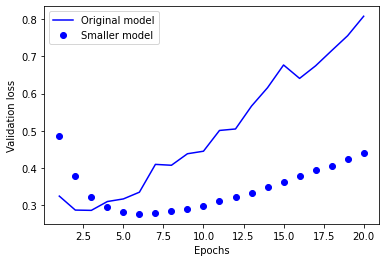

In [7]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b-', label='Original model')

plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 程式 4.5 具有更高容量的模型版本

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))  #改以更高容量的 512 個輸出單位
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [9]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 15s 302ms/step - loss: 0.6190 - acc: 0.7111 - val_loss: 0.3582 - val_acc: 0.8457
Epoch 2/20
49/49 [==============================] - 14s 295ms/step - loss: 0.2438 - acc: 0.9000 - val_loss: 0.2733 - val_acc: 0.8886
Epoch 3/20
49/49 [==============================] - 14s 297ms/step - loss: 0.1320 - acc: 0.9514 - val_loss: 0.3731 - val_acc: 0.8731
Epoch 4/20
49/49 [==============================] - 14s 291ms/step - loss: 0.0656 - acc: 0.9787 - val_loss: 0.4262 - val_acc: 0.8814
Epoch 5/20
49/49 [==============================] - 14s 291ms/step - loss: 0.0331 - acc: 0.9939 - val_loss: 0.4679 - val_acc: 0.8806
Epoch 6/20
49/49 [==============================] - 14s 291ms/step - loss: 0.0024 - acc: 0.9999 - val_loss: 0.6831 - val_acc: 0.8799
Epoch 7/20
49/49 [==============================] - 14s 294ms/step - loss: 0.0256 - acc: 0.9975 - val_loss: 0.6512 - val_acc: 0.8631
Epoch 8/20
49/49 [==============================] - 15s 298ms/step - 

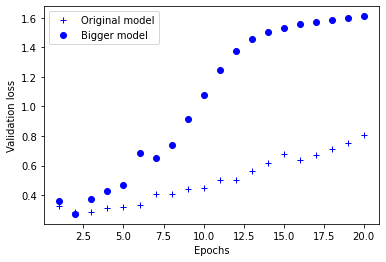

In [10]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

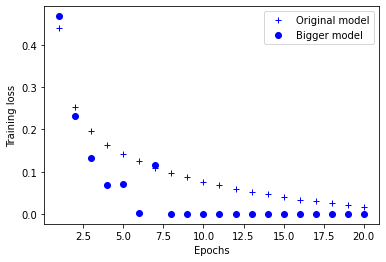

In [11]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 加入權重常規化
採用較小的權重值以抑制神經網路的複雜性  
* L1常規化：增加一**代價項**，與權重係數的絕對值成正比
* L2常規化/權重衰減：增加一**代價項**，與權重係數的平方成正比
於訓練時才會使用到L1、L2正規化，在驗證與測試時會自動拿掉


In [12]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),  #加入 L2 權重常規化並將學習率設為 0.001 
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [14]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.6100 - acc: 0.7289 - val_loss: 0.3994 - val_acc: 0.8791
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3411 - acc: 0.9036 - val_loss: 0.3438 - val_acc: 0.8840
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2731 - acc: 0.9243 - val_loss: 0.3404 - val_acc: 0.8837
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2481 - acc: 0.9313 - val_loss: 0.3325 - val_acc: 0.8873
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2353 - acc: 0.9346 - val_loss: 0.3412 - val_acc: 0.8837
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2224 - acc: 0.9400 - val_loss: 0.3521 - val_acc: 0.8812
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2126 - acc: 0.9473 - val_loss: 0.3528 - val_acc: 0.8801
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2084 - a

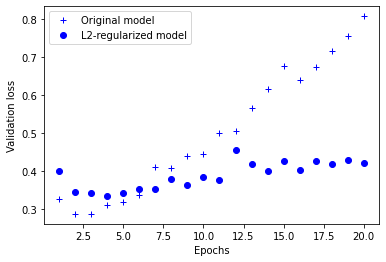

In [15]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [16]:
from keras import regularizers

regularizers.l1(0.001)  #L1 常規化

regularizers.l1_l2(l1=0.001, l2=0.001)  #同時使用 L1 及 L2 常規化

In [17]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)

NameError: ignored

In [ ]:
layer_output *= 0.5

In [ ]:
layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5

In [ ]:
model.add(layers.Dropout(0.5))

## 丟棄法(Dropout)

### 程式 4.8 將 Dropout 層添加到 IMDB 神經網路

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 機器學習的通用流程
1. 定義問題並建立資料集
2. 選擇一種評量成功的準則
3. 決定驗證程序
4. 準備資料
5. 開發出優於基準(baseline)的模型
6. 開發一個過度適配的模型
7. 常規化模型並調整參數